<h4>Nama: Fairuza Luthfiana</h4><p></p>
<h4>NIM: F1D02310111</h4><p></p>
<h4>KELOMPOK 9</h4>

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Berikut adalah beberapa library yang digunakan yaitu, import numpy as np, import matplotlib.pyplot as plt, dan import cv2 as cv. 

<h4>Load Gambar</h4>
Berikut kode yang digunakan untuk membaca gambar dari file "Assets/adudu.jpg". Selanjutnya gambar dibaca dengan menggunakan plt.imshow(adudu) gambar akan ditampilkan dilayar, kemudian terakhir,print(adudu.shape) digunakan untuk mencetak ukuran dari gambar tersebut.

(225, 225, 3)


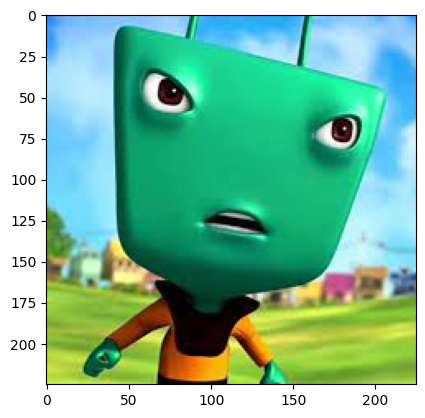

In [286]:
adudu = plt.imread("Assets/adudu.jpg")
plt.imshow(adudu)
print(adudu.shape)

<h4>Membuat gambar menjadi grayscale</h4>
Kode ini untuk mengubah gambar menjadi grayscale dengan menggunakan cv.cvtColor dari libarary cv2. Kemudian gambar ditampilkan kelayar dengan plt.imshow(adudu_gray, cmap = "gray") perlu penambahan cmap="gray" agar gambar ditampilkan dengan warna abu-abu dan terakhir print(adudu_gray.shape) mencetak ukuran gambar grayscale.

(225, 225)


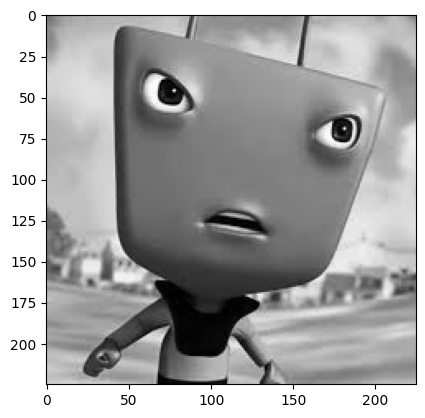

In [287]:
adudu_gray = cv.cvtColor(adudu, cv.COLOR_RGB2GRAY)
plt.imshow(adudu_gray, cmap = "gray")
print(adudu_gray.shape)

<h2>Soal Nomor 1</h2>

In [ ]:
kernel_3x3 = np.full((3,3), 1/9)
kernel_9x9 = np.full ((9,9), 1/81)
kernel_smooth = np.array([[1/10, 1/10, 1/10],
                         [1/10, 1/5, 1/10],
                         [1/10, 1/10, 1/10]])
kernel_sharp = np.array([[1/9, 1/9, 1/9],
                         [1/9, 8/9, 1/9],
                         [1/9, 1/9, 1/9]])
kernel3x3_empty = np.full((3,3), 0)
kernel9x9_empty = np.full((9,9), 0)

kode di atas tersebut mendefinisikan enam buah kernel yang digunakan dalam pengolahan citra digital konvolusi. Pertama ada kernel_3x3 yang digunakan untuk perataan yang berisi 3x3 dengan nilai seluruhnya 1/9.
ke-dua ada kernel_9x9 yang digunakan untuk perataan yang lebih besar dari 3x3.
ke-tiga ada kernel_smooth yang digunakan untuk memberikan efek smoothing pada citra, karena memiliki bobot besar di tengah yaitu 1/5.
ke-empat ada kernel_sharp yang digunakan untuk memberikan efek sharpening pada citra, karena memiliki bobot besar di tengah yaitu 8/9.
ke-lima ada kernel3x3_empty yang dimana kernel tersebut berukuran 3x3 dengan isi seluruh arraynya 0.
ke-enam ada kernel9x9_empty yang dimana kernel tersebut berukuran 9x9 dengan isi seluruh arraynya 0.

In [289]:
def konvo(img, kernel):
    img_h, img_w = img.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h //2
    pad_w = kernel_w //2
    pad_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
    result = np.zeros([img_h, img_w])

    for i in range(img_h):
        for j in range (img_w):
            result [i, j] = np.sum(pad_img[i:i+kernel_h, j:j+kernel_w] * kernel)
    return result

Kode di atas adalah fungsi def konvo(img, kernel): yang digunakan untuk melakukan konvolusi, yang dimana kode ini akan berfungsi untuk konvolusi citra dengan kernel.
Fungsi akan mengambil tinggi dan lebar dari citra serta kernel. Kemudian menghitung ukuran dari padding yang dibutuhkan yaitu setengah dari ukuran kernel. Result akan menyiapkan array kosong yang berisi tinggi dan lebar dari img. Proses konvolusi dilakukan dengan menjumlahkan hasil perkalian elemen kernel dengan citra yang sesuai tiap piksel. Kemudian return menghasilkan citra yang telah dikonvolusi dengan kernel.

In [ ]:
def op_modus (piksel_values):
    count = {}
    for num in piksel_values:
        if num in count:
            count[num] +=1
        else:
            count[num] = 1

    max_count = 0
    modus = None
    for num in count:
        if count[num] > max_count:
            max_count = count[num]
            modus = num
    return modus

Kode di atas adalah fungsi op_modus (piksel_values): yang digunakan untuk menghitung modus dari array, yaitu nilai yang paling sering muncul. 
Fungsi ini bekerja dengan cara membuat count = {} yang digunakan untuk menyimpan jumlah piksel yang muncul dalam array. Dengan cara melakukan perulangan if else, yang jika piksel belum ada maka nilainya satu dan jika piksel sudah ada count akan bertambah 1. Selanjutnya fungsi mencari nilai dengan frekuensi yang paling tinggi. Nilai yang memiliki jumlah kemunculan paling banyak akan disimpan dalam variabel modus dan itu yang akan di return.

In [309]:
def op_median(piksel_values):
    n = len(piksel_values)
    sorted_piksel = sorted(piksel_values)
    if n % 2 == 0:
        median1 = sorted_piksel[n//2]
        median2 = sorted_piksel[n//2-1]
        median = (median1 + median2)/2
    else:
        median = sorted_piksel[n//2]
    return median

Kode di atas adalah fungsi op_median(piksel_values): yang digunakan untuk menghitung nilai median dari array, yaitu nilai tengah dari data yang sudah diurutkan. Fungsi ini awalnya melakukan perhitungan panjang dari array, lalu megurutkan data dengan fungsi sorted. Digunakannya if else untuk jika hasil jumlah elemennya genap akan diambil nilai tengah dari rata-rata namun jika jumlah elemen ganjil maka langsung di ambil nilai yang berada pada posisi tengah.  

In [292]:
def konvo_modmed(img, kernel, jenis):
    img_h, img_w = img.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h //2
    pad_w = kernel_w //2
    pad_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
    result = np.zeros_like(img)

    for i in range(img_h):
        for j in range (img_w):
            temp = np.zeros(len(kernel)*len(kernel))
            indeks = 0
            for k in range (kernel_h):
                for l in range (kernel_w):
                    temp[indeks] += pad_img[i+k, j+l]
                    indeks+=1
                    if(jenis=="modus"):
                        result[i, j] = op_modus(temp)
                    else:
                        result[i, j] = op_median(temp)
    return result

Kode di atas adalah fungsi def konvo_modmed(img, kernel, jenis): yang merupakan implementasi menggunakan pendekatan nilai median dan juga modus dari kernel untuk tiap pikselnya. 
Fungsi ini bekerja dengan menghitung tinggi dan lebar dari citra serta kernel, kemudian diberikan pad dengan edge agar tidak perlu mengubah ukuran hasil. Hasilnya akan ditaruh dalam array kosong yang berukan citra. Dilakukan perulangan dengan nilai-nilai piksel dimasukkan kedalam array temp. Nilai dalam temp diproses sesuai dengan parameter jenis dengan if else dimana jika modus maka fungsi akan menghitung modus dan kalau tidak fungsi akan menghitung median. Hasil tersebut disimpan dalam result. 

Kode di bawah digunakan untuk memanggil fungsi-fungsi di atas untuk membandingkan hasil-hasilnya serta menampilkannya. 

1. mean3x3 dan mean9x9 adalah hasil mean yang akan menampilkan hasil konvolusi citra dengan kernel 3x3 dan kernel 9x9 untuk menghaluskan citra.
2. modus3x3 dan modus9x9 adalah hasil modus yang akan menampilkan hasil konvolusi yang menggunakan fungsi konvo_modmed agar mengurangi noise pada citra.
3. median3x3 dan media9x9 adalah hasil median yang akan menampilkan hasil konvolusi yang menggunkana fungsi konvo_modmed agar mengurangi noise pada citra namun lebih efektif daripada modus.
4. sharp adalah hasil konvolusi dari citra dengan kernel_sharp yang akan menghasilkan citra yang lebih tajam.
5. smooth adalah hasil konvolusi dari citra dengan kernel_smooth yang akan menghasilkan citra yang lebih halus.

Kemudian seluruh hasil operasi ditampilkan menggunkan subplot 2x4 dengan hasil yang telah dilakukan.

Text(0.5, 1.0, 'Median 9x9')

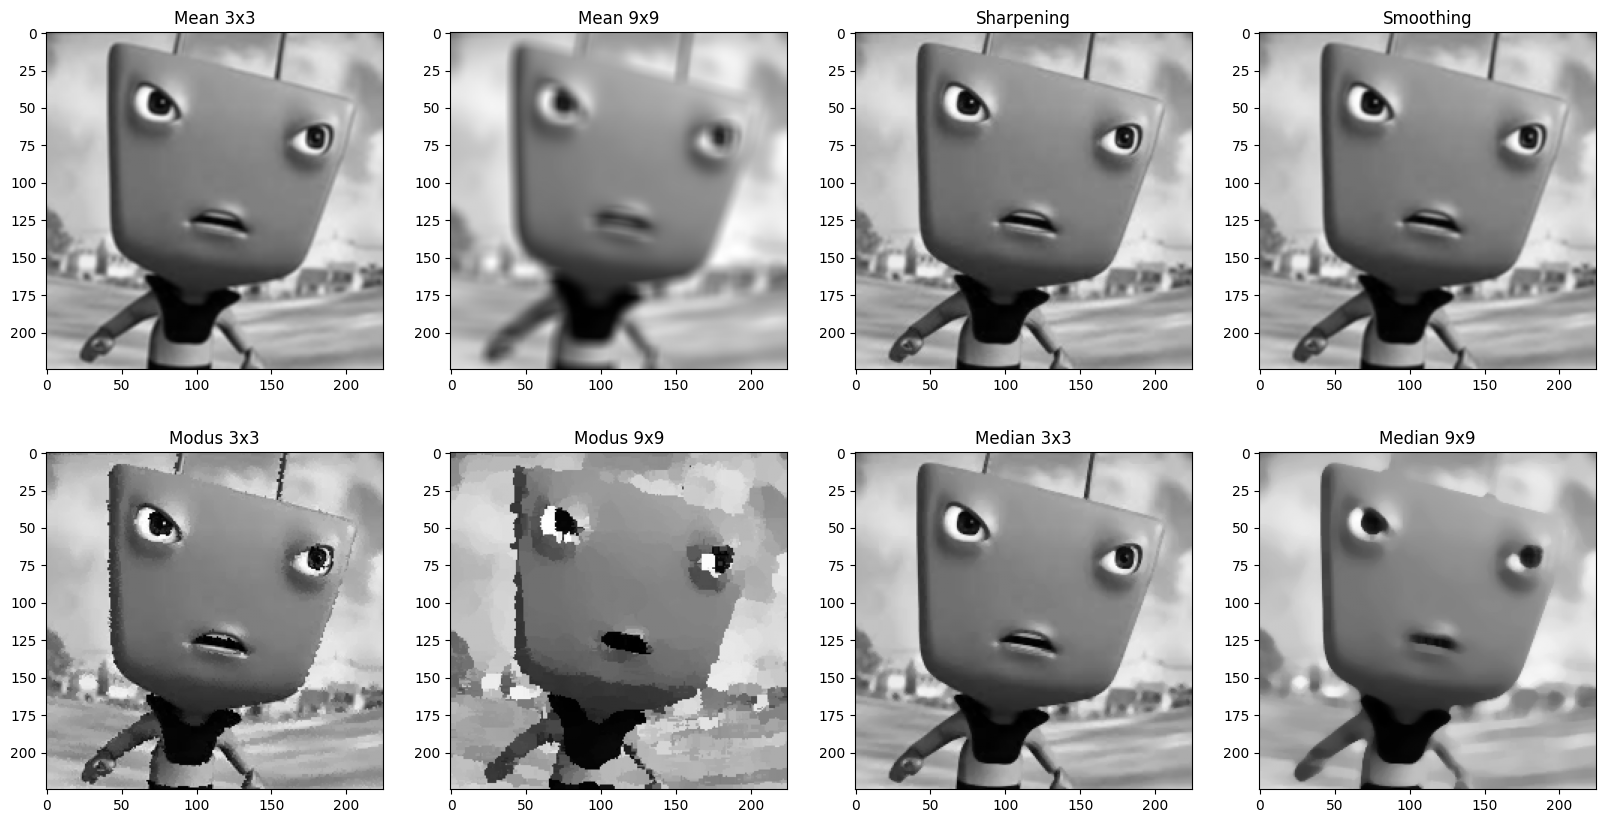

In [ ]:
mean3x3 = konvo(adudu_gray, kernel_3x3)
mean9x9 = konvo(adudu_gray, kernel_9x9)
modus3x3 = konvo_modmed(adudu_gray, kernel3x3_empty, "modus")
modus9x9 = konvo_modmed(adudu_gray, kernel9x9_empty, "modus")
median3x3 = konvo_modmed(adudu_gray, kernel3x3_empty, "median")
median9x9 = konvo_modmed(adudu_gray, kernel9x9_empty, "median")
sharp = konvo(adudu_gray, kernel_sharp)
smooth = konvo(adudu_gray, kernel_smooth)

plt.figure(figsize=(16,8))

plt.subplot(2,4,1)
plt.imshow(mean3x3, cmap='gray')
plt.title('Mean 3x3')

plt.subplot(2,4,2)
plt.imshow(mean9x9, cmap='gray')
plt.title('Mean 9x9')

plt.subplot(2,4,3)
plt.imshow(sharp, cmap='gray')
plt.title('Sharpening')

plt.subplot(2,4,4)
plt.imshow(smooth, cmap='gray')
plt.title('Smoothing')

plt.subplot(2,4,5)
plt.imshow(modus3x3, cmap='gray')
plt.title('Modus 3x3')

plt.subplot(2,4,6)
plt.imshow(modus9x9, cmap='gray')
plt.title('Modus 9x9')

plt.subplot(2,4,7)
plt.imshow(median3x3, cmap='gray')
plt.title('Median 3x3')

plt.subplot(2,4,8)
plt.imshow(median9x9, cmap='gray')
plt.title('Median 9x9')

In [295]:
Rt = np.array([[1,0],
               [0,-1]])

Rk = np.array([[0,1],
               [-1,0]])

Sx = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])

Sy = np.array([[1,2,1],
               [0,0,0],
               [-1,-2,-1]])

Px = np.array([[-1,0,1],
               [-1,0,1],
               [-1,0,1]])

Py = np.array([[1,1,1],
               [0,0,0],
               [-1,-1,-1]])

Kode di atas mendefinisikan berbagai kernel yang digunakan untuk deteksi tepi dari citra. Terdapat 3 operasi yaitu Roberts, Sobel dan Prewitt.

1. Rt dan Rk adalah kernel default deteksi tepi dari operator Roberts.
2. Sx dan Sy adalah kernel default deteksi tepi dari operator Sobel.
2. Px dan Py adalah kernel default deteksi tepi dari operator Prewitt.

In [296]:
def padding_baris(img):
    h, w = img.shape
    img_pad = np.zeros((h, w+1))
    for i in range(h):
        for j in range(w):
            img_pad[i][j] = img[i][j]
    return img_pad

def padding_kolom(img):
    h, w = img.shape
    img_pad = np.zeros((h+1, w))
    for i in range(h):
        for j in range(w):
            img_pad[i][j] = img[i][j]
    return img_pad

Kode di atas mendefinisikan dua buah fungsi yang berfungsi untuk memberikan padding pada citra. 

Fungsi pertama padding_baris(img): yang berfungsi untuk menambahkan padding sebanyak 1 piksel pada sebelah kanan citra. Padding dilakukan dengan membuat array baru dengan nilai 0 yang ukurannya di tambah 1 piksel dari citra asli img_pad = np.zeros((h, w+1)). Lalu, dilakukan looping untuk memindahkan citra asli ke dalam array baru sebelumnya, karena ukuran array lebih 1 piksel kosong sebelah kanan maka piksel itu akan menjadi padding pada citra.

Fungsi kedua padding_kolom(img): yang berfungsi untuk menambahkan padding sebanyak 1 piksel pada bagian bawah citra. Padding dilakukan dengan membuat array baru dengan nilai 0 yang ukurannya di tamabh 1 piksel dari citra asli img_pad = np.zeros((h+1, w)). Lalu, dilakukan looping untuk memindahkan citra asli ke dalam array baru sebelumnya, karena ukuran array lebih 1 piksel kosong bagian bawah maka piksel itu akan menjadi padding pada citra.

In [297]:
def konvo_edge(img, kernel, jenis):
    img_h, img_w = img.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h //2
    pad_w = kernel_w //2
    if(jenis!="roberts"):
        padded_img =  np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    else:
        padded_baris = padding_baris(img)
        padded_img = padding_kolom(padded_baris)
    result = np.zeros([img_h, img_w])

    for i in range(img_h):
        for j in range(img_w):
            result[i, j] = np.sum(padded_img[i:i+kernel_h, j:j+kernel_w] * kernel)
    return result

Kode di atas adalah fungsi def konvo_edge(img, kernel, jenis): yang digunakan untuk melakukan konvolusi citra dengan kernel untuk mendeteksi tepi pada citra. Terdapat 3 parameter yaitu img, kernel dan jenis (untuk jenis operator).
Fungsi ini bekerja dengan menghitung tinggi dan lebar dari citra serta kernel. Kemudian menggunakan fungsi if else untuk jika konvolusi bukan roberts maka citra dipadding dengan nilai konstan menggunakan np.pad dan jika konvolusi adalah Roberts maka padding dilakukan dengan menggunakan fungsi padding_baris dan padding_kolom yang bertujuan untuk menambah padding pada bagian kanan dan bawah citra. Kemudian fungsi melakukan konvolusi biasa dimana setiap elemen pada citra dikalikan dengan kernel yang sesuai dan hasilnya dijumlahkan pada variabel result. Kemudian fungsi me-return result.

In [ ]:
def deteksi_tepi(image, kernelX, kernelY, jenis):
    gradX = konvo_edge(image, kernelX, jenis)
    gradY = konvo_edge(image, kernelY, jenis)

    M = np.sqrt((gradX*gradX)+(gradY*gradY))

    return M

Kode di atas adalah fungsi def deteksi_tepi(image, kernelX, kernelY, jenis): yang digunakan untuk mendeteksi tepi pada citra grayscale dengan menggunakan dua buah kernel x (horizontal) dan y (vertikal). 
Fungsi tersebut bekerja pertama dengan memanggil konvo_edge untuk menerapkan konvolusi antara citra dengan kernel dengan hasil dua gradien yaitu gradX dan gradY. Kemudian M atau gradien total untuk menghitung dengan rumus np.sqrt((gradX*gradX)+(gradY*gradY)). Nilai M tersebut merepresentasikan tepi dalam gambar.

Kode di bawah digunakan untuk melakukan deteksi tepi menggunakan operator Robets pada berbagai hasil pemrosesan. Operator Robets menghasilkan hasil tepi yang tajam dan tipis.

1. R_mean3x3 adalah hasil deteksi tepi dari mean3x3
2. R_mean9x9 adalah hasil deteksi tepi dari mean9x9
3. R_sharp adalah hasil deteksi tepi dari sharp
4. R_smooth adalah hasil deteksi tepi dari smooth
5. R_modus3x3 adalah hasil deteksi tepi dari modus3x3
6. R_modus9x9 adalah hasil deteksi tepi dari modus9x9
7. R_median3x3 adalah hasil deteksi tepi dari median3x3
8. R_median9x9 adalah hasil deteksi tepi dari median9x9

Kemudian seluruh hasil operasi ditampilkan menggunkan subplot 2x4 dengan hasil yang telah dilakukan.

Text(0.5, 1.0, 'Roberts Median 9x9')

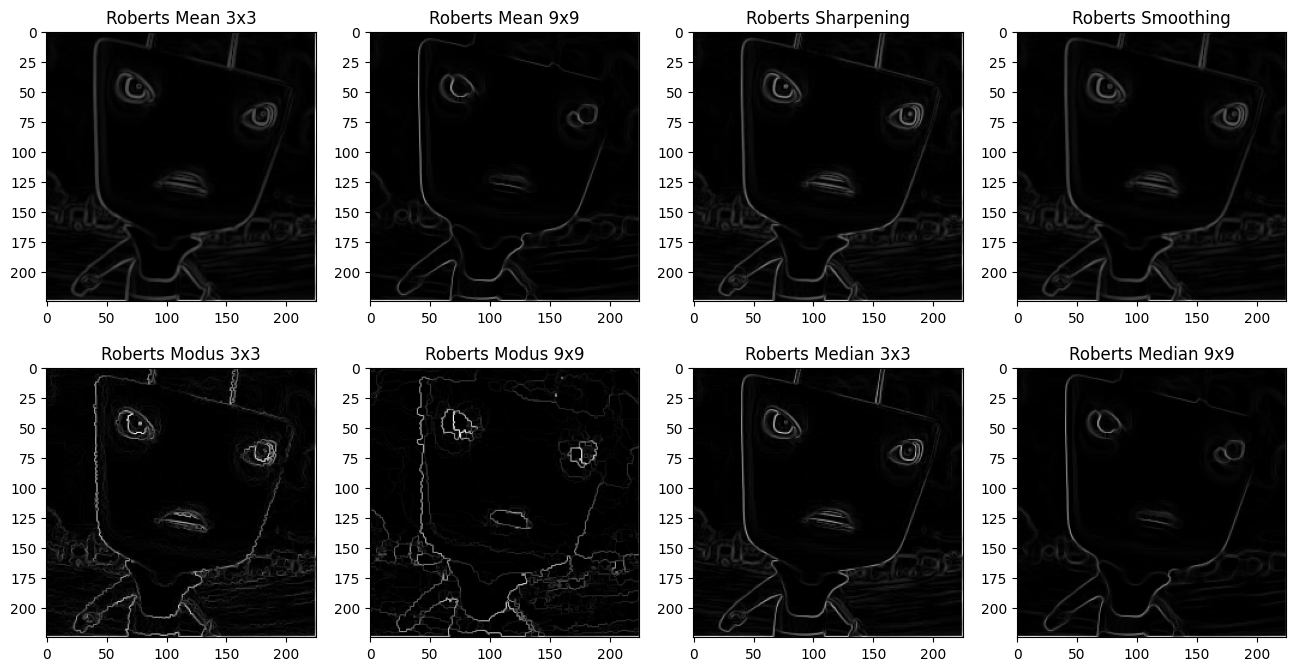

In [299]:
R_mean3x3 = deteksi_tepi(mean3x3, Rt, Rk, "roberts")
R_mean9x9 = deteksi_tepi(mean9x9, Rt, Rk, "roberts")
R_sharp = deteksi_tepi(sharp, Rt, Rk, "roberts")
R_smooth = deteksi_tepi(smooth, Rt, Rk, "roberts")
R_modus3x3 = deteksi_tepi(modus3x3, Rt, Rk, "roberts")
R_modus9x9 = deteksi_tepi(modus9x9, Rt, Rk, "roberts")
R_median3x3 = deteksi_tepi(median3x3, Rt, Rk, "roberts")
R_median9x9 = deteksi_tepi(median9x9, Rt, Rk, "roberts")

plt.figure(figsize=(16,8))

plt.subplot(2,4,1)
plt.imshow(R_mean3x3, cmap='gray')
plt.title('Roberts Mean 3x3')

plt.subplot(2,4,2)
plt.imshow(R_median9x9, cmap='gray')
plt.title('Roberts Mean 9x9')

plt.subplot(2,4,3)
plt.imshow(R_sharp, cmap='gray')
plt.title('Roberts Sharpening')

plt.subplot(2,4,4)
plt.imshow(R_smooth, cmap='gray')
plt.title('Roberts Smoothing')

plt.subplot(2,4,5)
plt.imshow(R_modus3x3, cmap='gray')
plt.title('Roberts Modus 3x3')

plt.subplot(2,4,6)
plt.imshow(R_modus9x9, cmap='gray')
plt.title('Roberts Modus 9x9')

plt.subplot(2,4,7)
plt.imshow(R_median3x3, cmap='gray')
plt.title('Roberts Median 3x3')

plt.subplot(2,4,8)
plt.imshow(R_median9x9, cmap='gray')
plt.title('Roberts Median 9x9')

Kode di bawah digunakan untuk melakukan deteksi tepi menggunakan operator Sobel pada berbagai hasil pemrosesan. Operator Sobel menghasilkan tepi yang lebih teabl daripada Roberts dengan hasil yang lebih halus.

1. S_mean3x3 adalah hasil deteksi tepi dari mean3x3
2. S_mean9x9 adalah hasil deteksi tepi dari mean9x9
3. S_sharp adalah hasil deteksi tepi dari sharp
4. S_smooth adalah hasil deteksi tepi dari smooth
5. S_modus3x3 adalah hasil deteksi tepi dari modus3x3
6. S_modus9x9 adalah hasil deteksi tepi dari modus9x9
7. S_median3x3 adalah hasil deteksi tepi dari median3x3
8. S_median9x9 adalah hasil deteksi tepi dari median9x9

Kemudian seluruh hasil operasi ditampilkan menggunkan subplot 2x4 dengan hasil yang telah dilakukan.

Text(0.5, 1.0, 'Sobel Median 9x9')

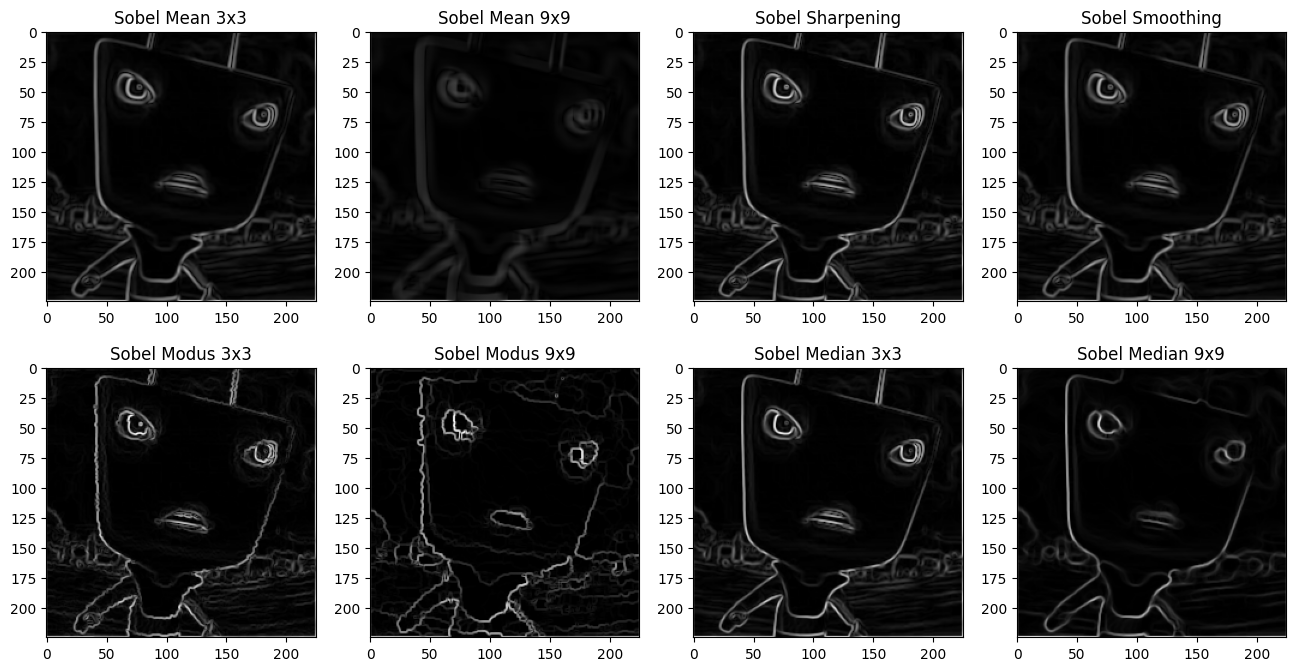

In [300]:
S_mean3x3 = deteksi_tepi(mean3x3, Sx, Sy, "sobel")
S_mean9x9 = deteksi_tepi(mean9x9, Sx, Sy, "sobel")
S_sharp = deteksi_tepi(sharp, Sx, Sy, "sobel")
S_smooth = deteksi_tepi(smooth, Sx, Sy, "sobel")
S_modus3x3 = deteksi_tepi(modus3x3, Sx,Sy, "sobel")
S_modus9x9 = deteksi_tepi(modus9x9, Sx, Sy, "sobel")
S_median3x3 = deteksi_tepi(median3x3, Sx, Sy, "sobel")
S_median9x9 = deteksi_tepi(median9x9, Sx, Sy, "sobel")

plt.figure(figsize=(16,8))

plt.subplot(2,4,1)
plt.imshow(S_mean3x3, cmap='gray')
plt.title('Sobel Mean 3x3')

plt.subplot(2,4,2)
plt.imshow(S_mean9x9, cmap='gray')
plt.title('Sobel Mean 9x9')

plt.subplot(2,4,3)
plt.imshow(S_sharp, cmap='gray')
plt.title('Sobel Sharpening')

plt.subplot(2,4,4)
plt.imshow(S_smooth, cmap='gray')
plt.title('Sobel Smoothing')

plt.subplot(2,4,5)
plt.imshow(S_modus3x3, cmap='gray')
plt.title('Sobel Modus 3x3')

plt.subplot(2,4,6)
plt.imshow(S_modus9x9, cmap='gray')
plt.title('Sobel Modus 9x9')

plt.subplot(2,4,7)
plt.imshow(S_median3x3, cmap='gray')
plt.title('Sobel Median 3x3')

plt.subplot(2,4,8)
plt.imshow(S_median9x9, cmap='gray')
plt.title('Sobel Median 9x9')

Kode di bawah digunakan untuk melakukan deteksi tepi menggunakan operator Prewitt pada berbagai hasil pemrosesan. Operator Prewitt menghasilkan tepi yang mirip dengan sobel namun sedikit lebih kasar.

1. P_mean3x3 adalah hasil deteksi tepi dari mean3x3
2. P_mean9x9 adalah hasil deteksi tepi dari mean9x9
3. P_sharp adalah hasil deteksi tepi dari sharp
4. P_smooth adalah hasil deteksi tepi dari smooth
5. P_modus3x3 adalah hasil deteksi tepi dari modus3x3
6. P_modus9x9 adalah hasil deteksi tepi dari modus9x9
7. P_median3x3 adalah hasil deteksi tepi dari median3x3
8. P_median9x9 adalah hasil deteksi tepi dari median9x9

Kemudian seluruh hasil operasi ditampilkan menggunkan subplot 2x4 dengan hasil yang telah dilakukan.

Text(0.5, 1.0, 'Prewitt Median 9x9')

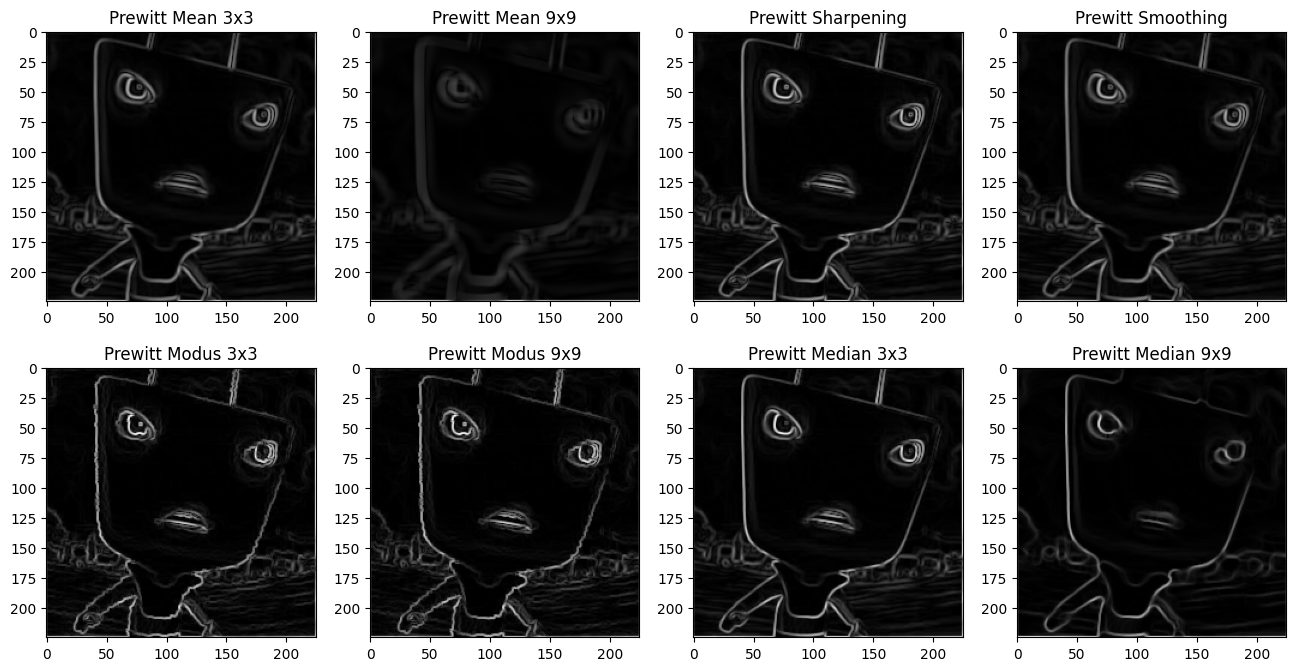

In [301]:
P_mean3x3 = deteksi_tepi(mean3x3, Px, Py, "prewitt")
P_mean9x9 = deteksi_tepi(mean9x9, Px, Py, "prewitt")
P_sharp = deteksi_tepi(sharp, Px, Py, "prewitt")
P_smooth = deteksi_tepi(smooth, Px, Py, "prewitt")
P_modus3x3 = deteksi_tepi(modus3x3, Px,Py, "prewitt")
P_modus9x9 = deteksi_tepi(modus9x9, Px, Py, "prewitt")
P_median3x3 = deteksi_tepi(median3x3, Px, Py, "prewitt")
P_median9x9 = deteksi_tepi(median9x9, Px, Py, "prewitt")

plt.figure(figsize=(16,8))

plt.subplot(2,4,1)
plt.imshow(P_mean3x3, cmap='gray')
plt.title('Prewitt Mean 3x3')

plt.subplot(2,4,2)
plt.imshow(P_mean9x9, cmap='gray')
plt.title('Prewitt Mean 9x9')

plt.subplot(2,4,3)
plt.imshow(P_sharp, cmap='gray')
plt.title('Prewitt Sharpening')

plt.subplot(2,4,4)
plt.imshow(P_smooth, cmap='gray')
plt.title('Prewitt Smoothing')

plt.subplot(2,4,5)
plt.imshow(P_modus3x3, cmap='gray')
plt.title('Prewitt Modus 3x3')

plt.subplot(2,4,6)
plt.imshow(P_modus3x3, cmap='gray')
plt.title('Prewitt Modus 9x9')

plt.subplot(2,4,7)
plt.imshow(P_median3x3, cmap='gray')
plt.title('Prewitt Median 3x3')

plt.subplot(2,4,8)
plt.imshow(P_median9x9, cmap='gray')
plt.title('Prewitt Median 9x9')

<h2>Soal Nomor 2</h2>

Berikut kode yang digunakan untuk membaca gambar dari file "Assets/boboiboy.jpg". Gambar dilakukan grayscale dengan menggunakan fungsi open cv, boboiboy_gray = cv.cvtColor(boboiboy, cv.COLOR_RGB2GRAY).  Selanjutnya kedua gambar dibaca dengan menggunakan plt.imshow gambar akan ditampilkan dilayar.

(400, 400, 3)
(400, 400)


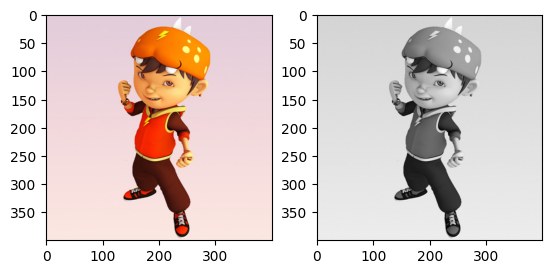

In [302]:
boboiboy = plt.imread("Assets/boboiboy.jpg")
boboiboy_gray = cv.cvtColor(boboiboy, cv.COLOR_RGB2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(boboiboy)
print(boboiboy.shape)

plt.subplot(1, 2, 2)
plt.imshow(boboiboy_gray, cmap='gray')
print(boboiboy_gray.shape)

Kode di bawah merupakan implementasi dari peningkatan kualitas citra.
Pertama citra di konvolusi dengan mean sebanyak dua kali agar garisnya menjadi lebih tebal. Kemudian hasil yang telah di-mean kan akan di prewitt. 
Terakhir menampilkan hasil dari dua operasi yang telah dilakukan sebelumnya. Yaitu hasil mean dan hasil prewitt.

(400, 400)
(400, 400)


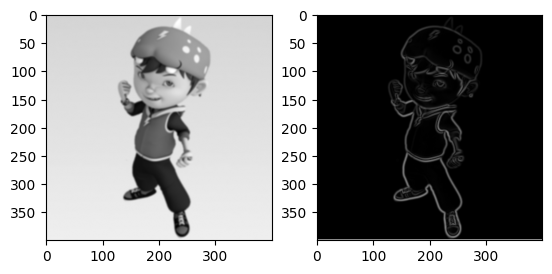

In [328]:
boy_mean3x3 = konvo(boboiboy_gray, kernel_3x3)
boy2_mean3x3 = konvo(boy_mean3x3, kernel_3x3)
boy_prewitt = deteksi_tepi(boy2_mean3x3, Px, Py, "prewitt")

plt.subplot(1, 2, 1)
plt.imshow(boy2_mean3x3, cmap='gray')
print(boy_mean3x3.shape)

plt.subplot(1, 2, 2)
plt.imshow(boy_prewitt, cmap= 'gray')
print(boy_prewitt.shape)

Kode di bawah ini adalah operasi untuk melakukan tresholding untuk citra yang sudah di prewitt sebelumnya dan di mediankan. 
Treshlod diatur dengan nilai 2 lalu dilakukakn proses np.where(boy_prewitt > threshold, 255, 0) yang dimana piksel dengan nilai lebih besar dari 2 akan diberi nilai 255 dan sisanya di ubah menjadi hitam.
Setelah dilakukan thresholding pada citra, citra hasil tersebut di mediankan untuk menghilangkan noise kecil dan memperhalus bentuk tepi dari citra.

(400, 400)


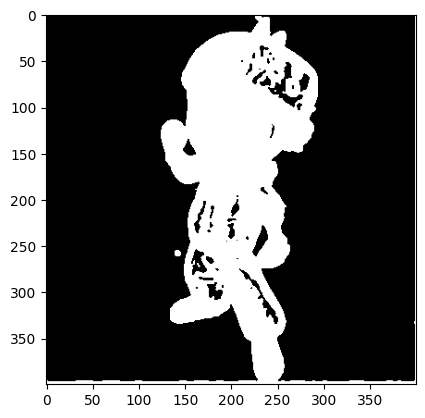

In [334]:
threshold = 2
ultra_boy = np.where(boy_prewitt > threshold, 255, 0)
med_ultra = konvo_modmed(ultra_boy, kernel3x3_empty, "median")

plt.imshow(med_ultra, cmap='gray')
print(med_ultra.shape)

Kode di bawah ini digunakan untuk memisahkan kanal warna RGB pada citra.
Terdapat 3 kanal warnal [:, :, 0] untuk warna merah, [:, :, 1] untuk warna hijau, dan [:, :, 2] untuk warna biru. Kemudia hasil dari pemisahan kanal tersebut ditampilkan dengan subplot 1x3.

(400, 400)
(400, 400)
(400, 400)


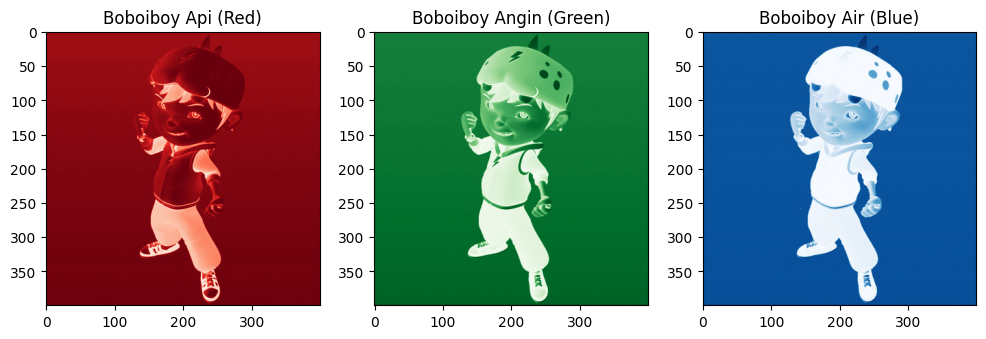

In [324]:
boy_R = boboiboy[:, :, 0]
boy_G = boboiboy[:, :, 1]
boy_B = boboiboy[:, :, 2]

plt.figure(figsize=(12,8))

plt.subplot(1, 3, 1)
plt.imshow(boy_R, cmap='Reds')
plt.title('Boboiboy Api (Red)')
print(boy_R.shape)

plt.subplot(1, 3, 2)
plt.imshow(boy_G, cmap='Greens')
plt.title('Boboiboy Angin (Green)')
print(boy_G.shape)

plt.subplot(1, 3, 3)
plt.imshow(boy_B, cmap='Blues')
plt.title('Boboiboy Air (Blue)')
print(boy_B.shape)

In [330]:
mask_median = np.where(med_ultra > 200, 255, 0)

def ultra_instinct(channel):
    objek = channel.copy()
    objek[mask_median == 0] = 0
    return objek

Kode di atas terdapat sebuah operasi untuk membuat masking biner dan fungsi ultra_instinct(channel): untuk mengambil channel gambar untuk diproses. 
operasi tersebut membuat masking biner dimana piksel dengan nilai di atas 200 di anggap sebagai bagian dari objek yang diberi nilai putih atau 255 sedangkan sisanya hitam. Dan fungsi tersebut mengambil semua piksel pada channel yang dimana mask_median bernilai 0 yang akan di set 0. Dan menghasilkan bagian objek dari channel tersebut.

Kode di bawah ini digunakan hasil tiap kenel warna yang sudah di masking.
Terdapat 3 hasil yaitu:
1. redboy hasil penyaringan dari fungsi ultra_instinct dengan warna merah
2. greenboy hasil penyaringan dari fungsi ultra_instinct dengan warna green
3. blueboy hasil penyaringan dari fungsi ultra_instinct dengan warna blue

Kemudian hasil dari ketiga operasi tersebut ditampilkan dengan subplot 1x3.

(400, 400)
(400, 400)
(400, 400)


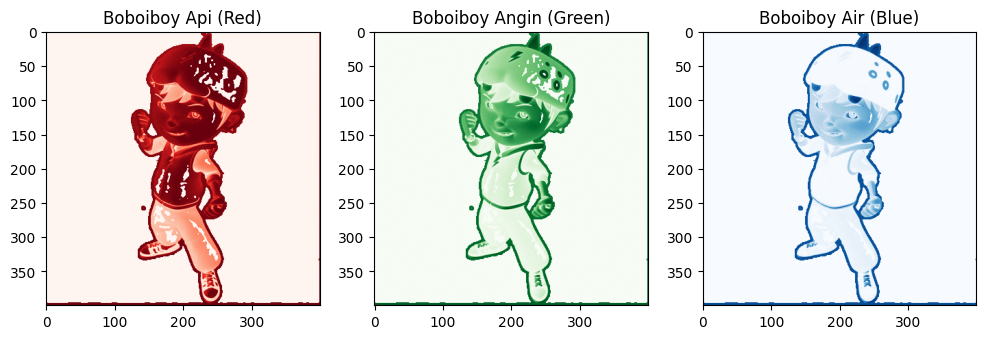

In [331]:
redboy = ultra_instinct(boy_R)
greenboy = ultra_instinct(boy_G)
blueboy = ultra_instinct(boy_B)

plt.figure(figsize=(12,8))

plt.subplot(1, 3, 1)
plt.imshow(redboy, cmap='Reds')
plt.title('Boboiboy Api (Red)')
print(redboy.shape)

plt.subplot(1, 3, 2)
plt.imshow(greenboy, cmap='Greens')
plt.title('Boboiboy Angin (Green)')
print(greenboy.shape)

plt.subplot(1, 3, 3)
plt.imshow(blueboy, cmap='Blues')
plt.title('Boboiboy Air (Blue)')
print(blueboy.shape)

Kode di bawah ini digunakan untuk menggabungkan ketiga hasil dari sebelumnya agar hasilnya kembali seperti citra semula namun terdapat padding abu-abu pada pinggir objeknya. Kemudian Final[mask_median == 0] = 255 digunakan untuk mengubah backround yang semulanya hitam agar menjadi warna putih.

(400, 400, 3)


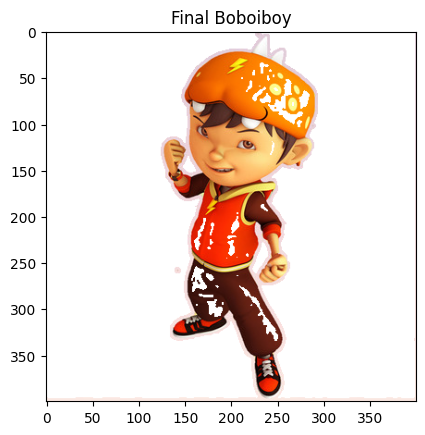

In [336]:
Final = np.stack([redboy, greenboy, blueboy], axis=-1)
Final[mask_median == 0] = 255

plt.imshow(Final)
plt.title('Final Boboiboy')
print(Final.shape)

<h3>Analisis</h3>
Jadi Transformasi citra boboiboy hingga menjadi mode "Ultimate Final Ultra Instinct" merupakan hasil dari beberapa rangkaian proses. 
1. Mengubah citra menjadi grayscale
2. Melakukan mean3x3 kepada citra sebanyak 2 kali agar garisnya menjadi lebih tebal
3. Melakukan deteksi tepi dengan operator prewitt
4. Dilakukannya thresholding agar objek pada citra boboiboy menjadi putih
5. Melakukan median3x3 agar hasil treshold sebelumnya menjadi lebih mulus dan menghilangkan noise kecilnya
6. Melakukan pemisahan kanal warna RGB pada citra
7. Melakukan masking biner untuk tiap warnanya
8. Menggabungkan hasil seluruh warnanya agar menjadi satu citra seperti citra aslinya.
Jadilah hasil citra aslinya menjadi memiliki garis tepi pada objek boboiboynya dan terdapat beberapa putih-putih pada objek.